In [354]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

!find "/content/drive/My Drive/Colab Notebooks/B3M1/" -name "*.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/B3M1/1695762808952-Population.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1695677925032-Fertility.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1698423984078-Metadata.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1698424162537-Birth.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1698424155860-Death.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1696621758438-LifeExpectancyMale.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1697051467887-GNI.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1692688523556-InternetUsers.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1697667169730-GDP.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1697667179137-Unemployment.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1697667198096-Continents.csv
/content/drive/My Drive/Colab Notebooks/B3M1/1697822132309-Languages.cs

In [355]:
happiness = pd.read_csv("/content/drive/My Drive/Colab Notebooks/B3M1/0.d5dr8hkdtk70.h9w788m6qlrHappiness_report.csv")
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [356]:
mexico = happiness[happiness['Country or region'] == 'Mexico']
mexico.set_index('Country or region', inplace=True)
mexico.index.name = None
mexico = mexico.T
mexico

,Mexico
Overall rank,23.000
Score,6.595
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

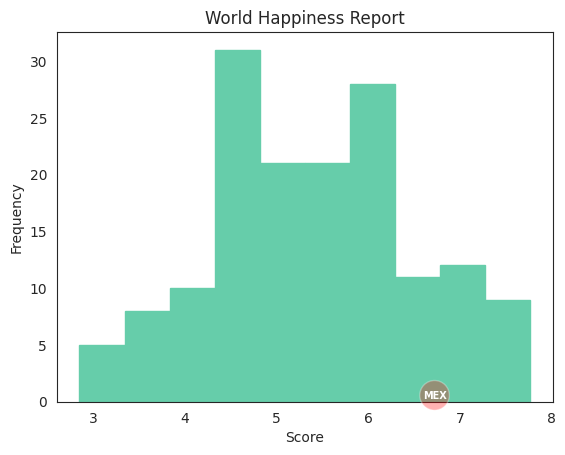

In [357]:
sns.set_style('white')
plt.hist(happiness['Score'],bins=10, color='#66cdaa', edgecolor = '#66cdaa')
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')

mex_value = happiness.loc[happiness['Country or region']=='Mexico','Score'].to_list()[0]
plt.annotate('MEX',xy=(mex_value,0.3),xytext=(mex_value,0.3),bbox=dict(boxstyle = 'circle', facecolor='red',alpha=0.3,pad=0.3),
             color = 'white', fontweight = 'bold', fontsize = 7)


plt.show()

5.- Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

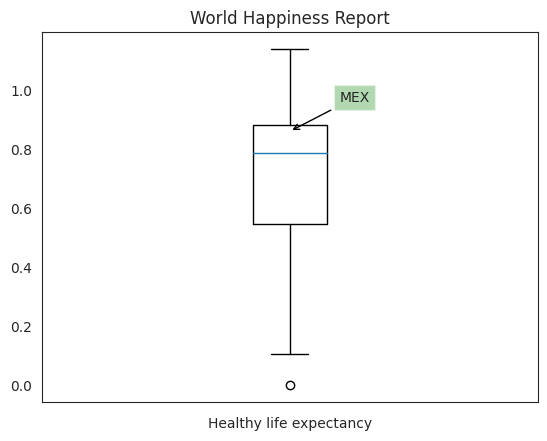

In [358]:
sns.set_palette('Paired')
sns.set_style('white')
plt.boxplot(happiness['Healthy life expectancy'])
plt.title('World Happiness Report')
plt.xlabel('Healthy life expectancy')
plt.xticks([1], [''])

mex_value = happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0]
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.1,mex_value+0.1),arrowprops=dict(arrowstyle='->',color='black'),bbox=dict(facecolor='green',alpha=0.3,pad=4))

plt.show()

6.-Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

In [359]:
mexico = mexico.drop(['Overall rank'], axis=0)
mexico = mexico.drop(['Score'], axis=0)
mexico.columns = ['Factors']
mexico

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


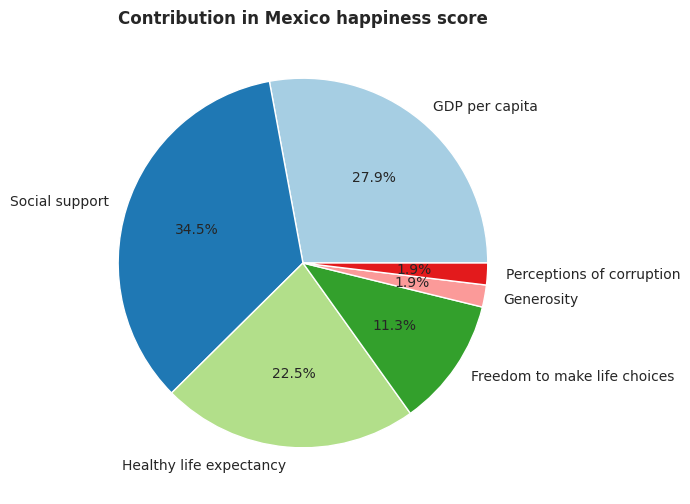

In [360]:
sns.set_palette('Paired')
mexico.plot.pie(y='Factors',labels=mexico.index,autopct='%1.1f%%', figsize=(6,6), legend=False) #Porcentajes con un decimal
plt.title('Contribution in Mexico happiness score', fontsize = 12, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

7.- Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 5 factores.

In [361]:
columns_needed = ['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


sub_df = happiness[columns_needed]

sub_df

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,0.026,0.000,0.105,0.225,0.235,0.035


In [362]:
# Encontrar los países seleccionados
most_happy_country = happiness.loc[happiness['Score'].idxmax(), 'Country or region']
least_happy_country = happiness.loc[happiness['Score'].idxmin(), 'Country or region']
mexico_country = 'Mexico'
additional_countries = ['United States', 'China']

# Crear una lista con los países seleccionados
selected_countries = [most_happy_country, least_happy_country, mexico_country] + additional_countries

# Filtrar el sub-dataframe para incluir solo los países seleccionados
filtered_sub_df = sub_df[sub_df['Country or region'].isin(selected_countries)]

# Ajustar el índice para que 'Country or region' sea la columna índice
filtered_sub_df.set_index('Country or region', inplace=True)

filtered_sub_df


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
United States,1.433,1.457,0.874,0.454,0.280,0.128
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
China,1.029,1.125,0.893,0.521,0.058,0.100
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


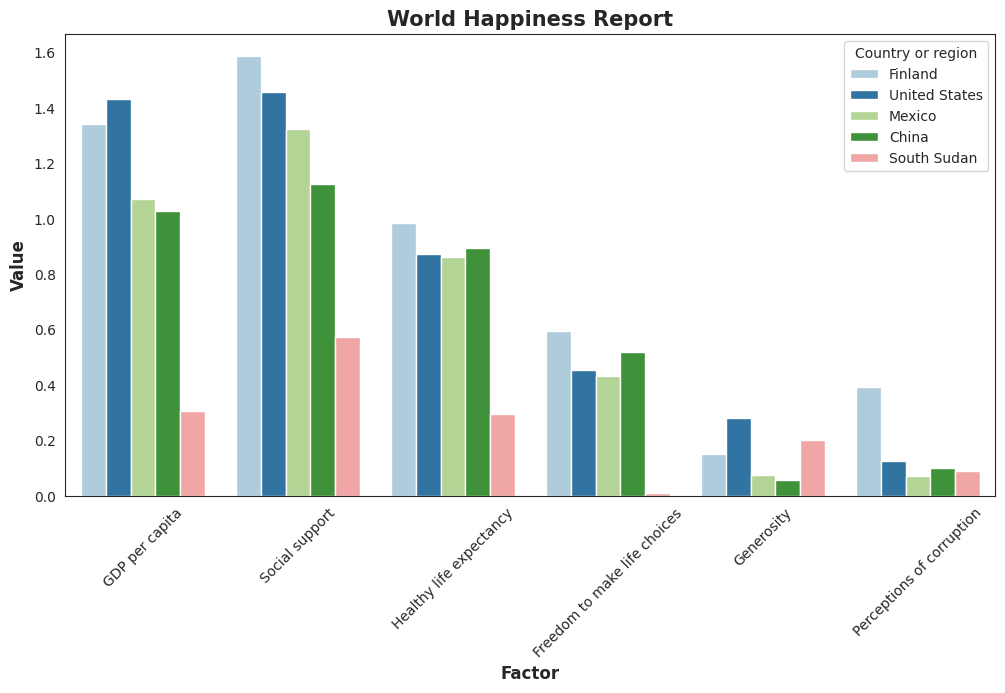

In [363]:
# Reestructurar el DataFrame para un formato largo
filtered_long_df = filtered_sub_df.reset_index().melt(id_vars='Country or region', var_name='Factor', value_name='Value')

# Establecer la configuración de la gráfica
plt.figure(figsize=(12, 6))
sns.set_palette('Paired')

# Crear la gráfica de barras con 'seaborn'
sns.barplot(x='Factor', y='Value', hue='Country or region', data=filtered_long_df, palette='Paired')

# Ajustar el título y las etiquetas
plt.title('World Happiness Report', fontsize=15, fontweight='bold')
plt.xlabel('Factor', fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.show()


8.- Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

In [364]:
columns_needed = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


sub_df = happiness[columns_needed]
sub_df.set_index('Score', inplace=True)

sub_df

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,,,,,,
7.769,1.340,1.587,0.986,0.596,0.153,0.393
7.600,1.383,1.573,0.996,0.592,0.252,0.410
7.554,1.488,1.582,1.028,0.603,0.271,0.341
7.494,1.380,1.624,1.026,0.591,0.354,0.118
7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
3.334,0.359,0.711,0.614,0.555,0.217,0.411
3.231,0.476,0.885,0.499,0.417,0.276,0.147
3.203,0.350,0.517,0.361,0.000,0.158,0.025


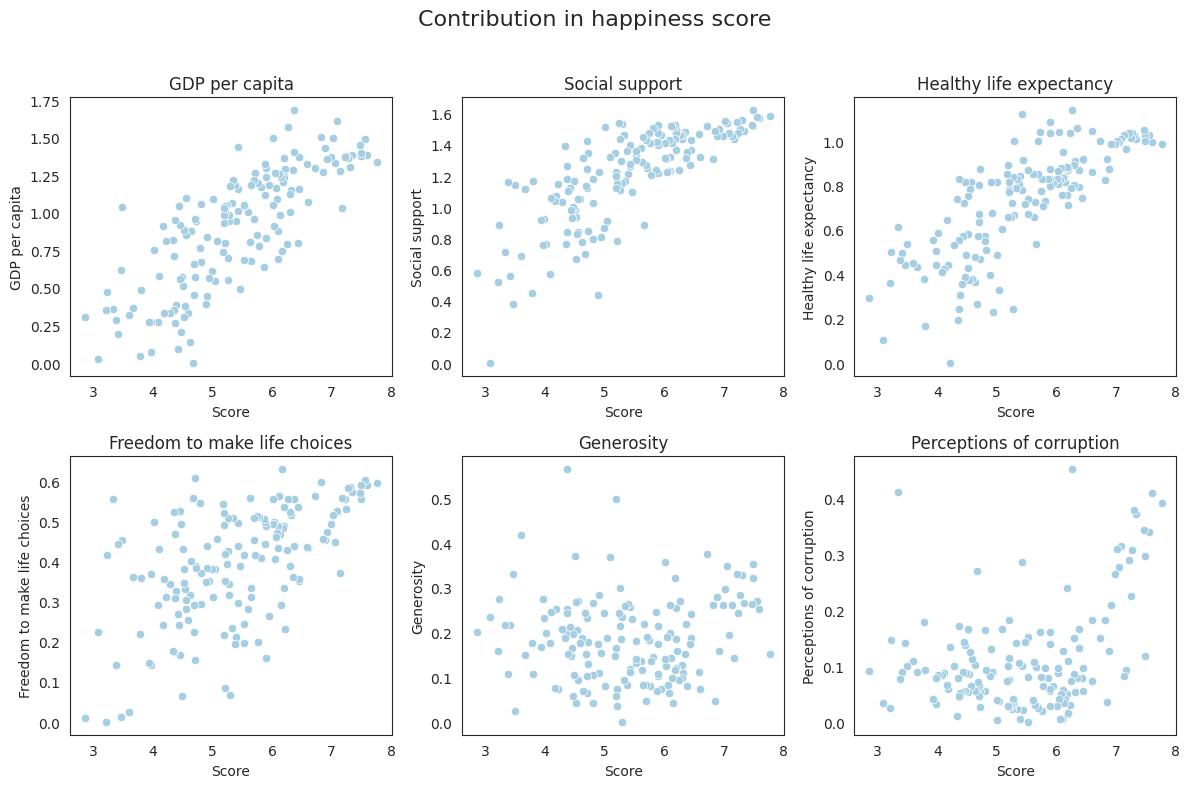

In [365]:
# Graficamos

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Contribution in happiness score', fontsize=16)

factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Generar los scatter plots
for ax, factor in zip(axes.flatten(), factors):              #zip() toma dos (o más) iterables y los empareja, creando un iterador de tuplas.
    sns.scatterplot(x='Score', y=factor, data=sub_df, ax=ax) #En este caso, zip(axes.flatten(), factors) empareja cada elemento del array plano
    ax.set_title(factor)                                     #de ejes con un elemento de la lista factors.
    ax.set_xlabel('Score')
    ax.set_ylabel(factor)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar el layout para que no se sobrepongan los títulos
plt.show()

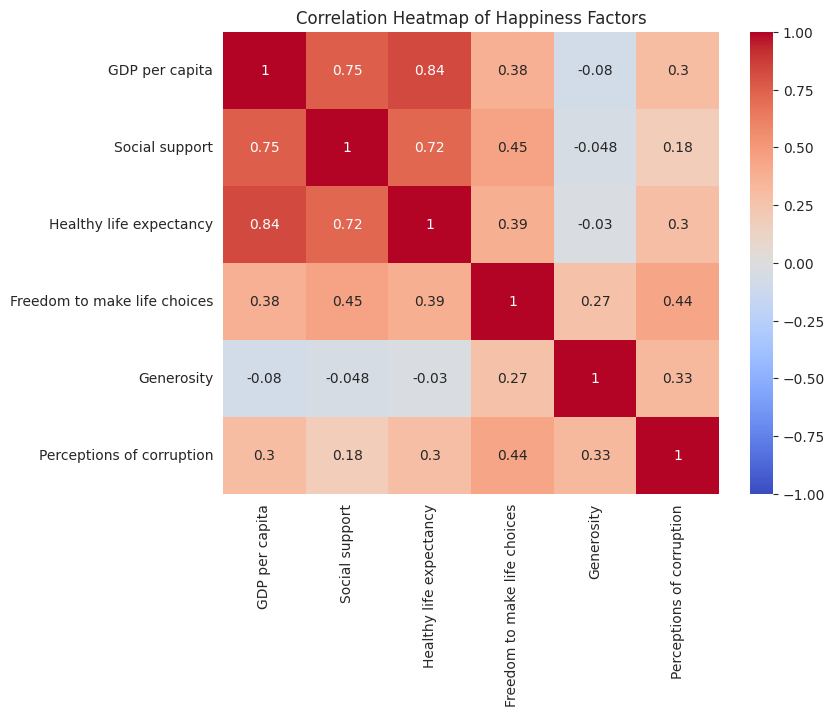

In [366]:
# Heatmap

correlation_matrix = sub_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Happiness Factors')
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [367]:
metadata = pd.read_csv("/content/drive/My Drive/Colab Notebooks/B3M1/0.82rdpda1oq20.on98sq47leMetadata.csv")
metadata.rename(columns={'TableName': 'Country or region'}, inplace=True)
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,Country or region
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [368]:
# Combinar los DataFrames
merged_df = pd.merge(metadata, happiness, on='Country or region')
merged_df.head()


,Country Code,Region,IncomeGroup,SpecialNotes,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,AFG,South Asia,Low income,NaN,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,21,6.825,1.503,1.310,0.825,0.598,0.262,0.182
3,ARG,Latin America & Caribbean,Upper middle income,NaN,Argentina,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,ARM,Europe & Central Asia,Upper middle income,NaN,Armenia,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [369]:
avg_happiness_by_region = merged_df.groupby('Region')['Score'].mean()
pd.DataFrame(avg_happiness_by_region)

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


<ipython-input-370-d1c60d10552a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_happiness_by_region.index, y=avg_happiness_by_region.values, palette = 'Paired')


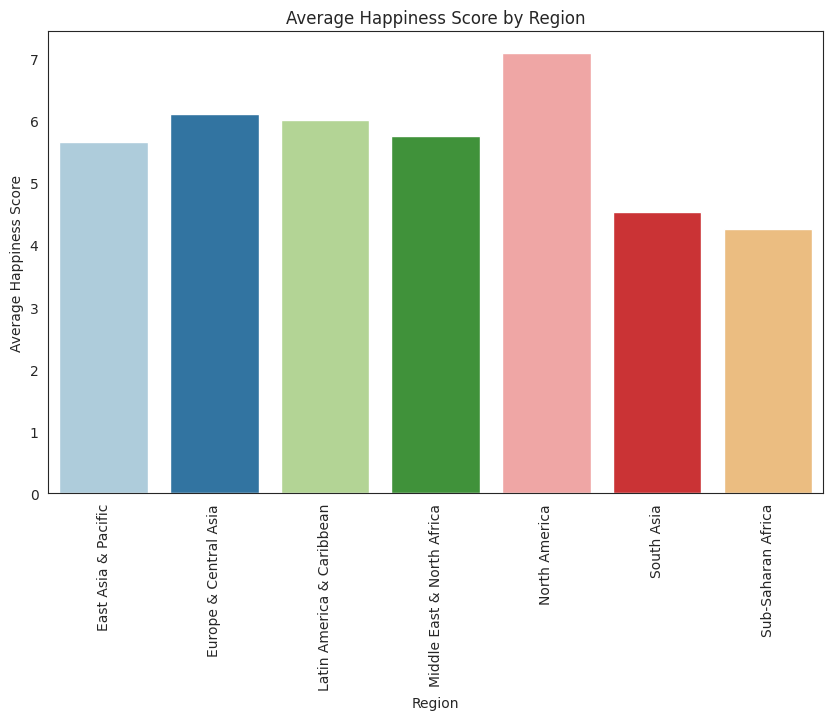

In [370]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_happiness_by_region.index, y=avg_happiness_by_region.values, palette = 'Paired')
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.show()